In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline   

In [2]:
#Reading the CSV file
df=pd.read_csv("/home/ghoshsonia/rfi/CleanTx.csv")
#df.set_index("Area Served", inplace = True) # Set 'Area Served' column as index on a Dataframe
#df=df.loc[["Perth", "Perth City"]] # Using the operator .loc[] to select multiple rows from the Dataframe
df

,Unnamed: 0,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,...,Deg,Min,Sec,Deg1,Min1,Sec1,Latitude in degrees,Longitude in degrees,Latitude in radians,Longitude in radians
0,0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000.0,10010794,...,34,58,44,138,42,31,-34.978889,138.708611,2.531096,2.420922
1,1,Adelaide,5FBI,92.7,Community,M,45,DA,20000.0,3371001,...,34,58,48,138,42,28,-34.980000,138.707778,2.531076,2.420907
2,2,Adelaide,5DDD,93.7,Community,M,45,OD,6300.0,3076001,...,34,58,48,138,42,28,-34.980000,138.707778,2.531076,2.420907
3,3,Adelaide,5UV,101.5,Community,M,60,DA,20000.0,6457001,...,34,58,44,138,42,31,-34.978889,138.708611,2.531096,2.420922
4,4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000.0,4191001,...,34,58,57,138,42,30,-34.982500,138.708333,2.531033,2.420917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2660,Yulara,8ABCRR,99.7,Retransmission,V,17,OD,320.0,1777010,...,25,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241
2661,2661,Yulara,8HA,100.5,Retransmission,V,17,OD,320.0,4225002,...,25,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241
2662,2662,Yulara,8KIN,102.1,Retransmission,V,27,OD,200.0,10007648,...,25,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241
2663,2663,Yulara,NaN,105.3,HPON,V,17,OD,400.0,10004023,...,25,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241


In [3]:
#Resolution of the map
nside = 32
print("The number of pixels for the given nside: " + str(hp.nside2npix(nside)))
#pixel_indices = hp.ang2pix(nside, np.deg2rad(df['Latitude in degrees'].to_numpy()) ,np.deg2rad(df['Longitude in degrees'].to_numpy()))


# Healpy pixel number when input angles are assumed to be longitude and latitude in radians
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(),lonlat=True)
df['Pixel_number']=pixel_indices 
print(pixel_indices)
df

The number of pixels for the given nside: 12288
[9713 9713 9713 ... 8686 8686 8821]


,Unnamed: 0,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,...,Min,Sec,Deg1,Min1,Sec1,Latitude in degrees,Longitude in degrees,Latitude in radians,Longitude in radians,Pixel_number
0,0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000.0,10010794,...,58,44,138,42,31,-34.978889,138.708611,2.531096,2.420922,9713
1,1,Adelaide,5FBI,92.7,Community,M,45,DA,20000.0,3371001,...,58,48,138,42,28,-34.980000,138.707778,2.531076,2.420907,9713
2,2,Adelaide,5DDD,93.7,Community,M,45,OD,6300.0,3076001,...,58,48,138,42,28,-34.980000,138.707778,2.531076,2.420907,9713
3,3,Adelaide,5UV,101.5,Community,M,60,DA,20000.0,6457001,...,58,44,138,42,31,-34.978889,138.708611,2.531096,2.420922,9713
4,4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000.0,4191001,...,58,57,138,42,30,-34.982500,138.708333,2.531033,2.420917,9713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2660,Yulara,8ABCRR,99.7,Retransmission,V,17,OD,320.0,1777010,...,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241,8686
2661,2661,Yulara,8HA,100.5,Retransmission,V,17,OD,320.0,4225002,...,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241,8686
2662,2662,Yulara,8KIN,102.1,Retransmission,V,27,OD,200.0,10007648,...,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241,8686
2663,2663,Yulara,NaN,105.3,HPON,V,17,OD,400.0,10004023,...,14,5,130,59,31,-25.234722,130.991944,2.701164,2.286241,8686


In [4]:
NPIX = hp.nside2npix(nside)
a=np.arange(NPIX) #Create an an array of pixel numbers with respect to the NSIDE
theta, phi = (hp.pix2ang(nside, ipix=a,lonlat=True)) # Array of the angular coordinates co-latitude(theta) and longitude(phi) in radians
                                        # With respect to the given NSIDE


In [5]:
theta

array([ 45., 135., 225., ..., 135., 225., 315.])

In [173]:
phi

array([ 88.53802884,  88.53802884,  88.53802884, ..., -88.53802884,
       -88.53802884, -88.53802884])

In [6]:
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        nside, hp.nside2resol(nside, arcmin=True)/60))

Approximate resolution at NSIDE 32 is 1.8 deg


In [7]:

#Creating user defined data points between 400 km to 36000 km in log scale
data_point=int(input("Enter number of data points : "))
altitude= np.logspace(np.log10(400),np.log10(36000),data_point) 
print(altitude)

Enter number of data points : 5
[  400.         1232.0281153  3794.7331922 11688.0449571 36000.       ]


In [8]:
FOV=np.zeros(len(altitude))
for i in range(0,len(altitude)):
# Consider a case of full coverage under elevation of 0 º
    Rad= 6371 # Mean radius of Earth in km
    FOV[i]= np.arcsin(Rad/(Rad+ altitude[i]))  # Field of view for maximal coverage in radians when elevation is 0 º 
    print(" The Field of view of the satellite at a height of",altitude[i],"km is",FOV[i], "radians")

 The Field of view of the satellite at a height of 400.0000000000001 km is 1.2253503498076224 radians
 The Field of view of the satellite at a height of 1232.0281152964096 km is 0.9935262634844625 radians
 The Field of view of the satellite at a height of 3794.733192202054 km is 0.6773282222797441 radians
 The Field of view of the satellite at a height of 11688.044957103548 km is 0.36054816398502965 radians
 The Field of view of the satellite at a height of 35999.99999999996 km is 0.15093470475288223 radians


In [9]:
# The surface of the coverage area of the Earth depends on the central angle
Central_angle=np.zeros(len(altitude))
for i in range(0,len(altitude)):
    Central_angle[i]=np.arccos(Rad/(Rad+altitude[i])) # Central angle in radians
    
    Dia_of_FOV=2*Central_angle*Rad  # Diameter of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV= Dia_of_FOV/2 # Radius of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV=Rad_of_FOV/Rad  # Radius of the FOV in Radians
    print(" The Radius of the Field of View for a height of",altitude[i],"km in radians is",Rad_of_FOV[i])
len(Rad_of_FOV)

 The Radius of the Field of View for a height of 400.0000000000001 km in radians is 0.3454459769872743
 The Radius of the Field of View for a height of 1232.0281152964096 km in radians is 0.5772700633104341
 The Radius of the Field of View for a height of 3794.733192202054 km in radians is 0.8934681045151526
 The Radius of the Field of View for a height of 11688.044957103548 km in radians is 1.210248162809867
 The Radius of the Field of View for a height of 35999.99999999996 km in radians is 1.4198616220420144


5

In [10]:
#For an altitude of 400 km
pixel_disc11=[]

for i in range(len(a)):
    #theta[i], phi[i] = (hp.pix2ang(nside, ipix=a[i]))
    vec1 = hp.ang2vec(theta[i],phi[i],lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
    pixel_disc11.append(hp.query_disc(nside, vec1, radius=Rad_of_FOV[0]))#Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
#arr1=np.array(pixel_disc11).reshape(180,num)  
len(pixel_disc11)

12288

In [11]:
#For an altitude of 400 km
perth=[]
lat=[-32.0108333333333,-33.8055555555555]
lon=[116.084444444444,151.180833333333]
for i in range(len(lat)):
    for j in range(len(lon)):
        v1 = hp.ang2vec(lon[j],lat[i],lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        perth.append(hp.query_disc(nside, v1, radius=Rad_of_FOV[0]))

In [18]:
#For an altitude of 3795 km
perth2=[]
lat=np.radians([(32.0108333333333),(33.8055555555555)])
lon=np.radians([116.084444444444,151.180833333333])
for i in range(len(lat)):
    for j in range(len(lon)):
        v2 = hp.ang2vec(lat[i],lon[j]) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        perth2.append(hp.query_disc(nside, v2, radius=Rad_of_FOV[2]))
len(perth2)

4

In [12]:
##For an altitude of 11690 km
perth3=[]
lat=[-32.0108333333333,37.8055555555555]
lon=[200.084444444444,265]
for i in range(len(lat)):
    for j in range(len(lon)):

        v3 = hp.ang2vec(lon[j],lat[i],lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
        perth3.append(hp.query_disc(nside, v3, radius=Rad_of_FOV[0]))

In [13]:
#For an altitude of 3795 km
pixel_disc13=[]
#lat=32.008333 # Latitude of the satellite in degrees
for i in range(len(a)):
   # theta[i], phi[i] = (hp.pix2ang(nside, ipix=a[i],lonlat=True))
    vec1 = hp.ang2vec(theta[i],phi[i],lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
    pixel_disc13.append(hp.query_disc(nside, vec1, radius=Rad_of_FOV[2]))#Array of indices of the pixel number that are inside the circle/disc specified

In [14]:
#For an altitude of 11690 km
pixel_disc14=[]
#lat=32.008333 # Latitude of the satellite in degrees
for i in range(len(a)):
    #theta[i], phi[i] = (hp.pix2ang(nside, ipix=a[i],))
    
    vec1 = hp.ang2vec(theta[i],phi[i],lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
    pixel_disc14.append(hp.query_disc(nside, vec1, radius=Rad_of_FOV[3]))#Array of indices of the pixel number that are inside the circle/disc specified

In [15]:
#For an altitude of 36000 km
pixel_disc15=[]
for i in range(len(a)):
    theta[i], phi[i] = (hp.pix2ang(nside, ipix=a[i]))
    vec1 = hp.ang2vec(theta[i],phi[i]) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vecto
    pixel_disc15.append(hp.query_disc(nside, vec1, radius=Rad_of_FOV[4]))

#np.shape(pixel_disc15)
len(pixel_disc15)

12288

In [103]:
#For an altitude of 400 km
data= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point=np.arange(len(pixel_disc11))
for j in range(len(pixel_disc11)):
    data[pixel_disc11[j]]=point[j]

In [19]:
#For an altitude of 400 km
data_p= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point_p=np.arange(len(perth))
for j in range(len(perth)):
    data_p[perth[j]]=point_p[j]

In [20]:
#For an altitude of 3795 km
data_p2= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point_p2=np.arange(len(perth2))
for j in range(len(perth2)):
    data_p2[perth2[j]]=point_p2[j]


In [21]:
#For an altitude of 11690 km
data_p3= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
    
point_p3=np.arange(len(perth3))
for j in range(len(perth3)):
    data_p3[perth3[j]]=point_p3[j]


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


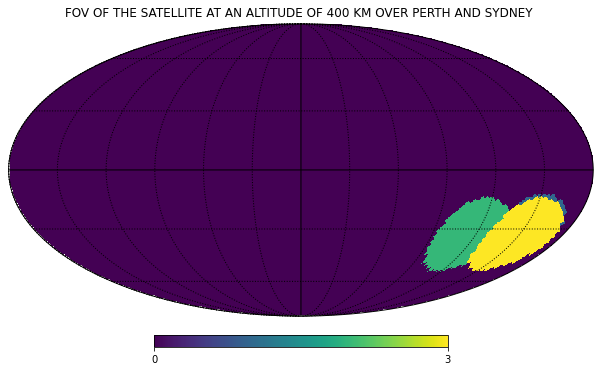

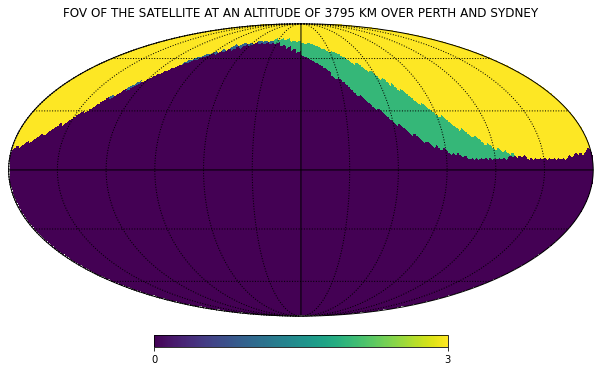

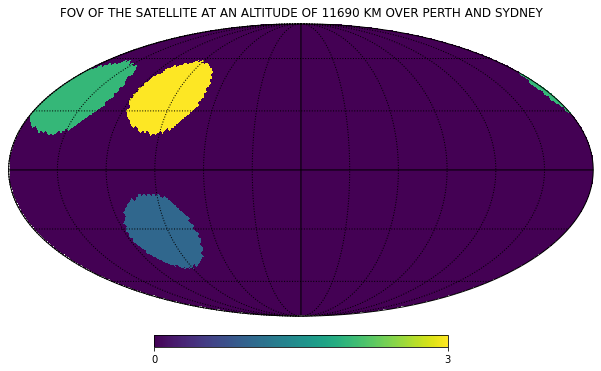

In [22]:
#Plot a healpix map (given as an array) in Mollweide projection
hp.mollview(data_p,title='FOV OF THE SATELLITE AT AN ALTITUDE OF 400 KM OVER PERTH AND SYDNEY ',flip='geo')
hp.graticule()
##hp.mollview(data_p1)
#hp.graticule()
hp.mollview(data_p2,title='FOV OF THE SATELLITE AT AN ALTITUDE OF 3795 KM OVER PERTH AND SYDNEY',flip='geo')
hp.graticule()
hp.mollview(data_p3,title='FOV OF THE SATELLITE AT AN ALTITUDE OF 11690 KM OVER PERTH AND SYDNEY',flip='geo')
hp.graticule()
#hp.mollview(data4,cmap='inferno')
#hp.graticule()

In [23]:
#For an altitude of 400 km
Comm_pixel_400=[]
for i in range(len(pixel_disc11)):
    Comm_pixel_400.append(np.intersect1d(pixel_indices,pixel_disc11[i]))#common pixel between satellite pixel no and Tx pixel no 

In [24]:
Comm_pixel_3795=[]
for i in range(len(pixel_disc13)):
    Comm_pixel_3795.append(np.intersect1d(pixel_indices,pixel_disc13[i]))#common pixel between satellite pixel no and Tx pixel no

In [25]:
#For an altitude of 11690 km
Comm_pixel_11690=[]
for i in range(len(pixel_disc14)):
    Comm_pixel_11690.append(np.intersect1d(pixel_indices,pixel_disc14[i]))#common pixel between satellite pixel no and Tx pixel no

In [26]:
#For an altitude of 36000 km
Comm_pixel_36000=[]
for i in range(len(pixel_disc15)):
    Comm_pixel_36000.append(np.intersect1d(pixel_indices,pixel_disc15[i]))#common pixel between satellite pixel no and Tx pixel no
    #For an altitude of 36000 km
len(Comm_pixel_36000)

12288

In [27]:
#Converting ERP[ in Watts] to EIRP[ in Watts]
res=200*1e3
df['EIRP']=1.64 * df['Maximum ERP (W)']

Rx_Power= np.zeros((len(df),len(altitude)))
for i in range(0,len(altitude)):
    for j in range(0,len(df)):
        wavelength= (3*1e8)/(df.iloc[j]['Frequency(MHz)']*1e6)
        Rx_Power[j][i]= ((df.iloc[j]['EIRP'])*(wavelength)**2)/(4*np.pi*altitude[i])**2 #he Friis Transmission Equation
#Rx_Power[:,0]
df['Rx_Power in Watt at 400 km']= Rx_Power[:,0]
df['Rx_Power in dBm at 400 km']=10.*np.log10(Rx_Power[:,0])+30 #in dBm
df['Rx_Power in Kelvin at 400 km']=Rx_Power[:,0]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 1232 km']= Rx_Power[:,1]
df['Rx_Power in dBm at 1232 km']=10.*np.log10(Rx_Power[:,1])+30 #in dBm
df['Rx_Power in Kelvin at 1232 km']=Rx_Power[:,1]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 3795 km']= Rx_Power[:,2]
df['Rx_Power in dBm at 3795 km']=10.*np.log10(Rx_Power[:,2])+30 #in dBm
df['Rx_Power in Kelvin at 3795 km']=Rx_Power[:,2]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 11690 km']= Rx_Power[:,3]
df['Rx_Power in dBm at 11690 km']=10.*np.log10(Rx_Power[:,3])+30 #in dBm
df['Rx_Power in Kelvin at 11690 km']=Rx_Power[:,3]/(1.38*1e-23*res) #in Kelvin

df['Rx_Power in Watt at 36000 km']= Rx_Power[:,4]
df['Rx_Power in dBm at 36000 km']=10.*np.log10(Rx_Power[:,4])+30 #in dBm
df['Rx_Power in Kelvin at 36000 km']=Rx_Power[:,4]/(1.38*1e-23*res) #in Kelvin
#df=df.sort_values(by=['Frequency(MHz)'])
#df=df['Frequency(MHz)'].round

df['Frequency(MHz)']=df['Frequency(MHz)'].round()
df

,Unnamed: 0,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,...,Rx_Power in Kelvin at 1232 km,Rx_Power in Watt at 3795 km,Rx_Power in dBm at 3795 km,Rx_Power in Kelvin at 3795 km,Rx_Power in Watt at 11690 km,Rx_Power in dBm at 11690 km,Rx_Power in Kelvin at 11690 km,Rx_Power in Watt at 36000 km,Rx_Power in dBm at 36000 km,Rx_Power in Kelvin at 36000 km
0,0,Adelaide,5ADL,92.0,Commercial,M,60,DA,20000.0,10010794,...,5.283422e+14,1.537103e-04,-8.132969,5.569216e+13,1.620249e-05,-17.904181,5.870469e+12,1.707893e-06,-27.675394,6.188017e+11
1,1,Adelaide,5FBI,93.0,Community,M,45,DA,20000.0,3371001,...,5.192624e+14,1.510688e-04,-8.208253,5.473506e+13,1.592405e-05,-17.979466,5.769582e+12,1.678542e-06,-27.750678,6.081673e+11
2,2,Adelaide,5DDD,94.0,Community,M,45,OD,6300.0,3076001,...,1.600950e+14,4.657636e-05,-13.318345,1.687549e+13,4.909579e-06,-23.089557,1.778833e+12,5.175151e-07,-32.860770,1.875055e+11
3,3,Adelaide,5UV,102.0,Community,M,60,DA,20000.0,6457001,...,4.331260e+14,1.260091e-04,-8.995980,4.565549e+13,1.328253e-05,-18.767192,4.812511e+12,1.400102e-06,-28.538405,5.072832e+11
4,4,Adelaide,5ADD,102.0,Commercial,M,60,DA,20000.0,4191001,...,4.263782e+14,1.240460e-04,-9.064171,4.494421e+13,1.307560e-05,-18.835384,4.737536e+12,1.378289e-06,-28.606596,4.993801e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2660,Yulara,8ABCRR,100.0,Retransmission,V,17,OD,320.0,1777010,...,7.182506e+12,2.089603e-06,-26.799362,7.571026e+11,2.202635e-07,-36.570575,7.980562e+10,2.321781e-08,-46.341787,8.412251e+09
2661,2661,Yulara,8HA,100.0,Retransmission,V,17,OD,320.0,4225002,...,7.068612e+12,2.056468e-06,-26.868780,7.450972e+11,2.167708e-07,-36.639993,7.854014e+10,2.284965e-08,-46.411205,8.278857e+09
2662,2662,Yulara,8KIN,102.0,Retransmission,V,27,OD,200.0,10007648,...,4.280503e+12,1.245325e-06,-29.047174,4.512047e+11,1.312688e-07,-38.818386,4.756115e+10,1.383694e-08,-48.589599,5.013385e+09
2663,2663,Yulara,NaN,105.0,HPON,V,17,OD,400.0,10004023,...,8.048585e+12,2.341571e-06,-26.304926,8.483954e+11,2.468233e-07,-36.076139,8.942873e+10,2.601746e-08,-45.847351,9.426616e+09


In [ ]:
def Power_cal(a,)

In [28]:
reduced_df_400=[]
for i in range(len(Comm_pixel_400)):
    
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_400[i])]
    reduced_df_400.append(reduced_df)
   # reduced_df_400.remove(reduced_df.empty=='True')

#reduced_df_400=np.array(reduced_df_400).reshape(180,num)


df400 = {}
df400_filter={}
df400_group={}
power400=[]
power400_1=[]
power400_2=[]


for m in range(len(reduced_df_400)):
   
    df400[m]=pd.DataFrame(reduced_df_400[m])
    df400[m].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 400 km':'Total Power in Kelvin'}, inplace = True)
    df400_filter[m]=df400[m].filter(['Total Power in Kelvin','Frequency in MHz'])
    df400_group[m]=df400_filter[m].groupby(['Frequency in MHz']).sum()
    df400_group[m]=df400_group[m].reset_index()
    if len(df400_group[m].index)==0 or (df400_group[m].values!= 90).all():
        power400=np.append(power400,0)
    else:
        power400=np.append(power400,df400_group[m].loc[df400_group[m]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df400_group[m].index)==0 or (df400_group[m].values!= 100).all():
        power400_1=np.append(power400_1,0)
    else:
        power400_1=np.append(power400_1,df400_group[m].loc[df400_group[m]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df400_group[m].index)==0 or (df400_group[m].values!= 108).all():
         power400_2=np.append(power400,0)
    else:
        power400_2=np.append(power400,df400_group[m].loc[df400_group[m]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])
            
            

In [29]:
reduced_df_3795=[]
for i in range(len(Comm_pixel_3795)):
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_3795[i])]
    reduced_df_3795.append(reduced_df)
   
df3795 = {}
df3795_filter={}
df3795_group={}
power3795=[]
power3795_1=[]
power3795_2=[]
for j in range(len(reduced_df_3795)):
    df3795[j]=pd.DataFrame(reduced_df_3795[j])
    df3795[j].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 3795 km':'Total Power in Kelvin'}, inplace = True)
    df3795_filter[j]=df3795[j].filter(['Total Power in Kelvin','Frequency in MHz'])
    
    df3795_group[j]=df3795_filter[j].groupby(['Frequency in MHz']).sum()
    df3795_group[j]=df3795_group[j].reset_index()
    if len(df3795_group[j].index)==0 or (df3795_group[j].values!= 90).all():
        power3795=np.append(power3795,0)
    else:
        power3795=np.append(power3795,df3795_group[j].loc[df3795_group[j]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df3795_group[j].index)==0 or (df3795_group[j].values!= 100).all():
        power3795_1=np.append(power3795_1,0)
    else:
        power3795_1=np.append(power3795_1,df3795_group[j].loc[df3795_group[j]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df3795_group[j].index)==0 or (df3795_group[j].values!= 108).all():
        power3795_2=np.append(power3795,0)
    else:
        power3795_2=np.append(power3795,df3795_group[j].loc[df3795_group[j]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])

In [30]:
reduced_df_11690=[]
for i in range(len(Comm_pixel_11690)):
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_11690[i])]
    reduced_df_11690.append(reduced_df)
  
df11690 = {}
df11690_filter={}
df11690_group={}
power11690=[]
power11690_1=[]
power11690_2=[]
for j in range(len(reduced_df_11690)):
    df11690[j]=pd.DataFrame(reduced_df_11690[j])
    df11690[j].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 11690 km':'Total Power in Kelvin'}, inplace = True)
    df11690_filter[j]=df11690[j].filter(['Total Power in Kelvin','Frequency in MHz'])
    
    df11690_group[j]=df11690_filter[j].groupby(['Frequency in MHz']).sum()
    df11690_group[j]=df11690_group[j].reset_index()
    if len(df11690_group[j].index)==0 or (df11690_group[j].values!= 90).all():
        power11690=np.append(power11690,0)
    else:
        power11690=np.append(power11690,df11690_group[j].loc[df11690_group[j]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df11690_group[j].index)==0 or (df11690_group[j].values!= 100).all():
        power11690_1=np.append(power11690_1,0)
    else:
        power11690_1=np.append(power11690_1,df11690_group[j].loc[df11690_group[j]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df11690_group[j].index)==0 or (df11690_group[j].values!= 108).all():
        power11690_2=np.append(power11690,0)
    else:
        power11690_2=np.append(power11690,df11690_group[j].loc[df11690_group[j]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])

In [32]:
reduced_df_36000=[]
for i in range(len(Comm_pixel_36000)):
    
    reduced_df=df[df['Pixel_number'].isin(Comm_pixel_36000[i])]
    reduced_df_36000.append(reduced_df)
   # reduced_df_400.remove(reduced_df.empty=='True')

#reduced_df_400=np.array(reduced_df_400).reshape(180,num)


df36000 = {}
df36000_filter={}
df36000_group={}
power36000=[]
power36000_1=[]
power36000_2=[]


for m in range(len(reduced_df_36000)):
    #for k in range(len(reduced_df_400[m])):
    df36000[m]=pd.DataFrame(reduced_df_36000[m])
    df36000[m].rename(columns = {'Frequency(MHz)':'Frequency in MHz', 'Rx_Power in Kelvin at 36000 km':'Total Power in Kelvin'}, inplace = True)
    df36000_filter[m]=df36000[m].filter(['Total Power in Kelvin','Frequency in MHz'])
    #df400_filter[j]=df400_filter[j]np.round(df400_filter[j]['Frequency in MHz'])
    df36000_group[m]=df36000_filter[m].groupby(['Frequency in MHz']).sum()
    df36000_group[m]=df36000_group[m].reset_index()
    if len(df36000_group[m].index)==0 or (df36000_group[m].values!= 90).all():
        power36000=np.append(power36000,0)
    else:#(df400_group[j].values== 88.9).any():
        power36000=np.append(power36000,df36000_group[m].loc[df36000_group[m]['Frequency in MHz'] == 90, 'Total Power in Kelvin'])
  
    if len(df36000_group[m].index)==0 or (df36000_group[m].values!= 100).all():
        power36000_1=np.append(power36000_1,0)
    else:#(df400_group[j].values== 88.9).any():
        power36000_1=np.append(power36000_1,df36000_group[m].loc[df36000_group[m]['Frequency in MHz'] == 100, 'Total Power in Kelvin'])
  

    if len(df36000_group[m].index)==0 or (df36000_group[m].values!= 108).all():
         power36000_2=np.append(power36000,0)
    else:#(df400_group[j].values== 88.9).any():
        power36000_2=np.append(power36000,df36000_group[m].loc[df36000_group[m]['Frequency in MHz'] == 108, 'Total Power in Kelvin'])
            

In [33]:
data=power400
data1=power400_1
data2=power400_2
m= np.zeros(hp.nside2npix(nside)) 
for i in range(len(pixel_disc11)):
    m[pixel_disc11[i]]=data[i]

In [34]:
data3795=power3795
data3795_1=power3795_1
data3795_2=power3795_2
m3795= np.zeros(hp.nside2npix(nside)) 
for i in range(len(pixel_disc13)):
    m3795[pixel_disc13[i]]=data3795[i]

In [35]:
n3795 = np.zeros(hp.nside2npix(nside))
for i in range(len(pixel_disc13)):
    n3795[pixel_disc13[i]] = data3795_1[i]

In [36]:
p3795 = np.zeros(hp.nside2npix(nside))
for i in range(len(pixel_disc13)):
    p3795[pixel_disc13[i]] = data3795_2[i]

In [37]:
data11690=power11690
data11690_1=power11690_1
data11690_2=power11690_2
m11690= np.zeros(hp.nside2npix(nside)) 
for i in range(len(pixel_disc14)):
    m11690[pixel_disc14[i]]=data11690[i]

In [38]:
n11690 = np.zeros(hp.nside2npix(nside))
for i in range(len(pixel_disc14)):
    n11690[pixel_disc14[i]] = data11690_1[i]

In [39]:
p11690 = np.zeros(hp.nside2npix(nside))
for i in range(len(pixel_disc14)):
    p11690[pixel_disc14[i]] = data11690_2[i]

In [42]:
data36=power36000
data36_1=power36000_1
data36_2=power36000_2
m36= np.zeros(hp.nside2npix(nside)) 
for i in range(len(pixel_disc15)):
    m36[pixel_disc15[i]]=data36[i]

In [40]:
n = np.zeros(hp.nside2npix(nside))
for i in range(len(pixel_disc11)):
    n[pixel_disc11[i]] = data1[i]

In [43]:
n36= np.zeros(hp.nside2npix(nside)) 
for i in range(len(pixel_disc15)):
    n36[pixel_disc15[i]]=data36_1[i]

In [44]:
p = np.zeros(hp.nside2npix(nside))
for i in range(len(pixel_disc11)):
    p[pixel_disc11[i]] = data2[i]

In [45]:
p36= np.zeros(hp.nside2npix(nside)) 
for i in range(len(pixel_disc15)):
    p36[pixel_disc15[i]]=data36_2[i]

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


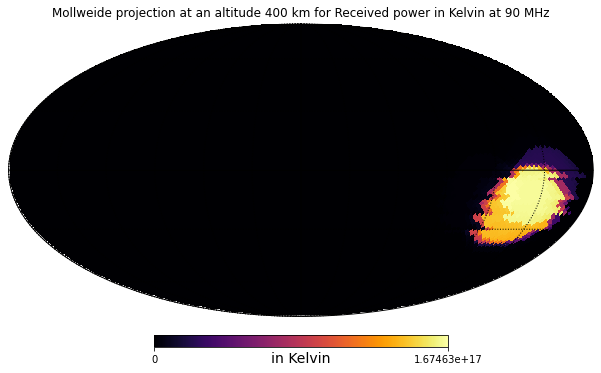

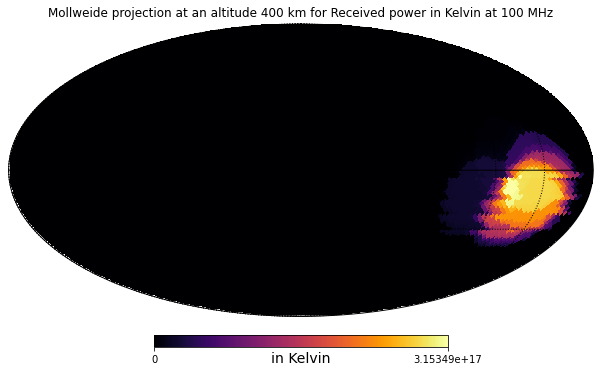

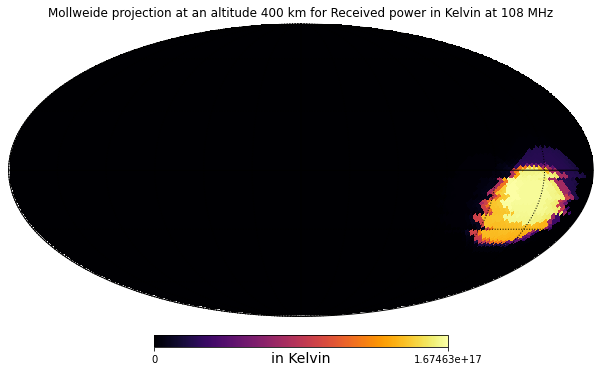

In [46]:
hp.mollview(m,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()
hp.mollview(n,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 108 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


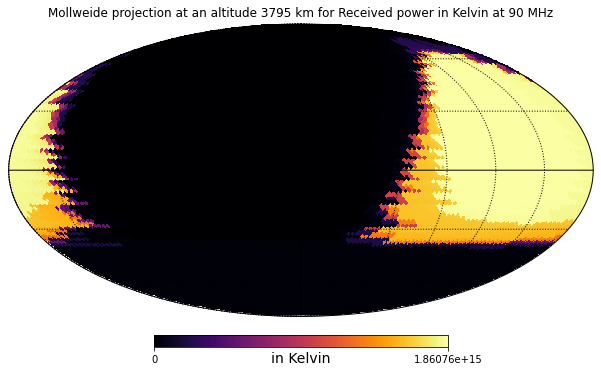

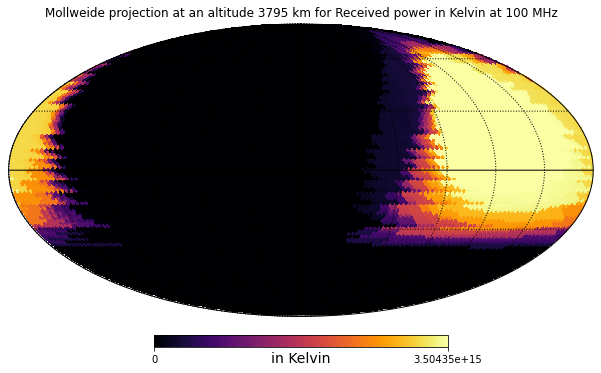

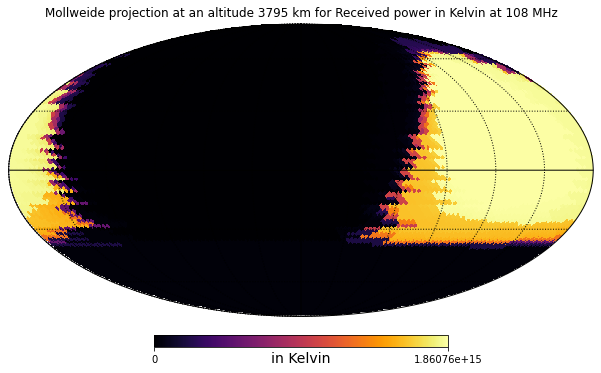

In [47]:
hp.mollview(m3795,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3795 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='geo')
hp.graticule()
hp.mollview(n3795,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3795 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p3795,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3795 km for Received power in Kelvin at 108 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()

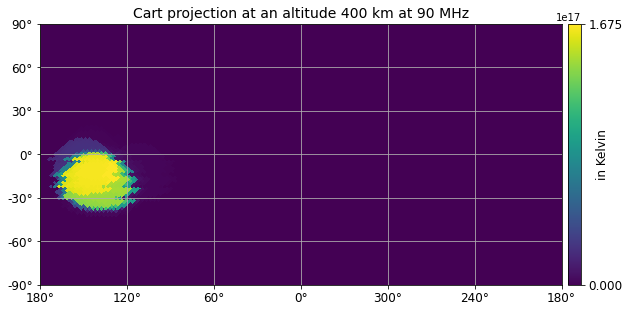

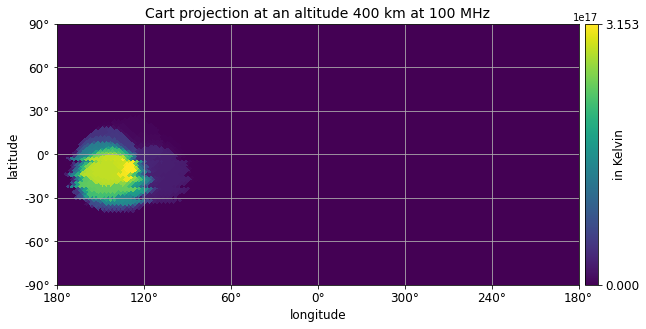

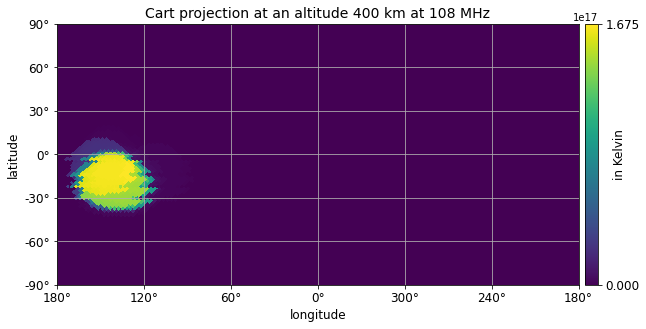

In [48]:
hp.projview(
    m,
   
    graticule=True,
    #cmap='plasma',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 400 km at 90 MHz"
)

hp.projview(
    n,
   
    graticule=True,
   # cmap='cividis',
    graticule_labels=True,
    unit="in Kelvin",
    xlabel="longitude",
    ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 400 km at 100 MHz"
)

hp.projview(
    p,
   
    graticule=True,
    #cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
    xlabel="longitude",
    ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 400 km at 108 MHz",
    #flip='geo'
    
)
#hp.graticule()

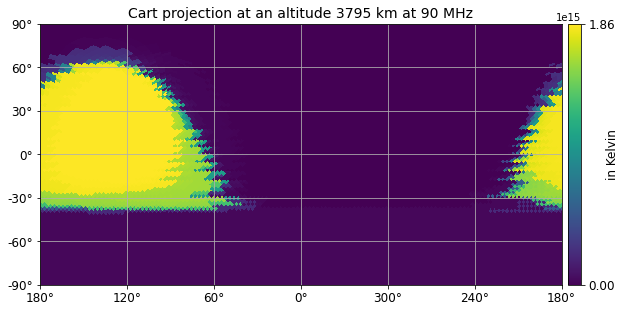

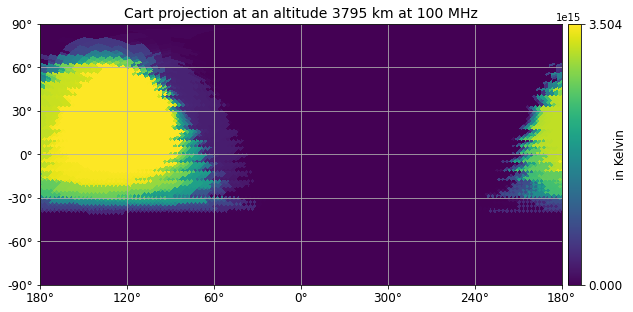

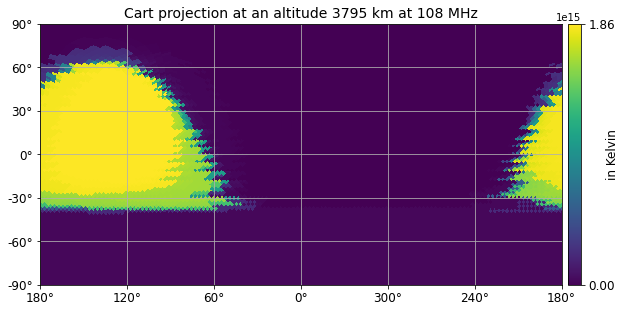

In [49]:
hp.projview(
    m3795,
   
    graticule=True,
   #cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 3795 km at 90 MHz"
)

hp.projview(
    n3795,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 3795 km at 100 MHz"
)

hp.projview(
    p3795,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 3795 km at 108 MHz",
   # flip='geo'
)

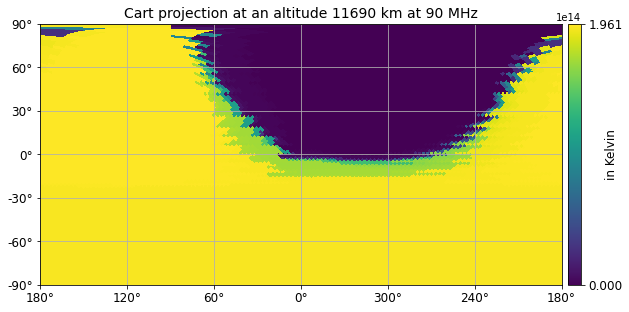

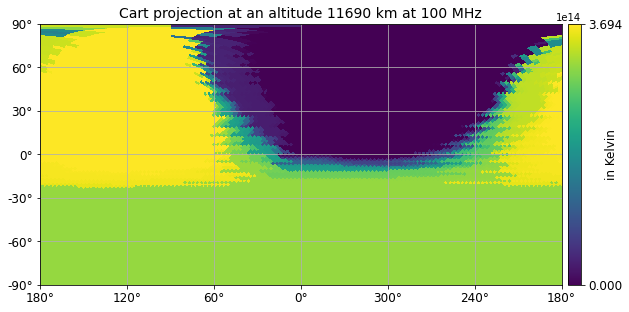

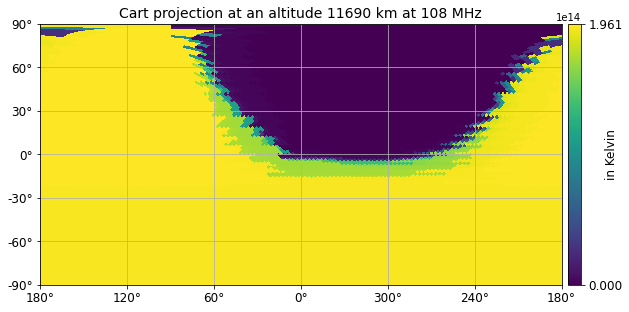

In [50]:
hp.projview(
    m11690,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 11690 km at 90 MHz"
)

hp.projview(
    n11690,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 11690 km at 100 MHz"
)

hp.projview(
    p11690,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 11690 km at 108 MHz",
   # flip='geo'
)

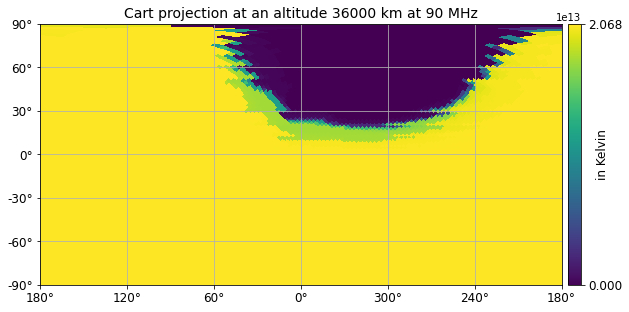

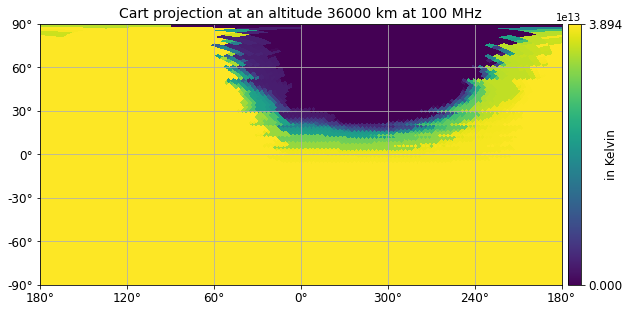

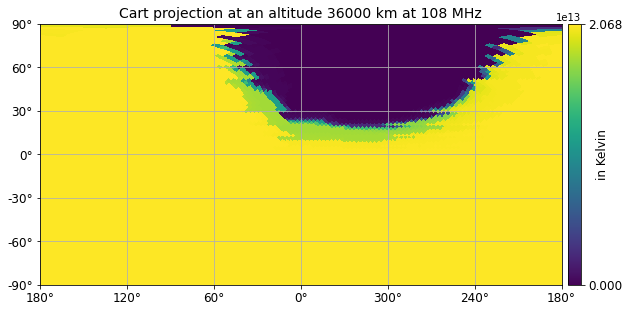

In [51]:
hp.projview(
    m36,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 36000 km at 90 MHz"
)

hp.projview(
    n36,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 36000 km at 100 MHz"
)

hp.projview(
    p36,
   
    graticule=True,
   # cmap='inferno',
    graticule_labels=True,
    unit="in Kelvin",
   # xlabel="longitude",
    #ylabel="latitude",
    cb_orientation="vertical",
    projection_type="cart",
    title="Cart projection at an altitude 36000 km at 108 MHz",
   # flip='geo'
)

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


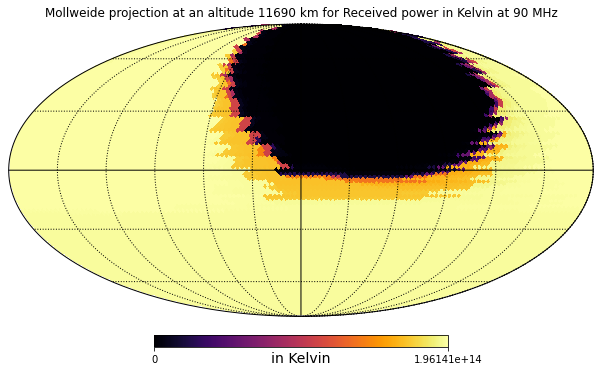

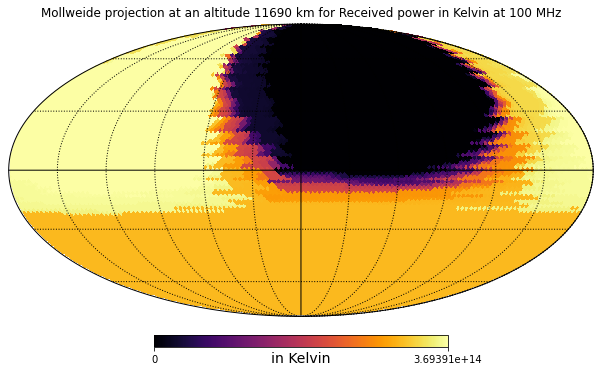

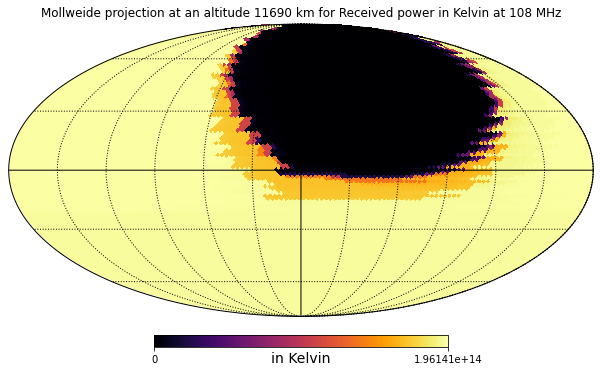

In [52]:
hp.mollview(m11690,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 11690 km for Received power in Kelvin at 90 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(n11690,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 11690 km for Received power in Kelvin at 100 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p11690,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 11690 km for Received power in Kelvin at 108 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


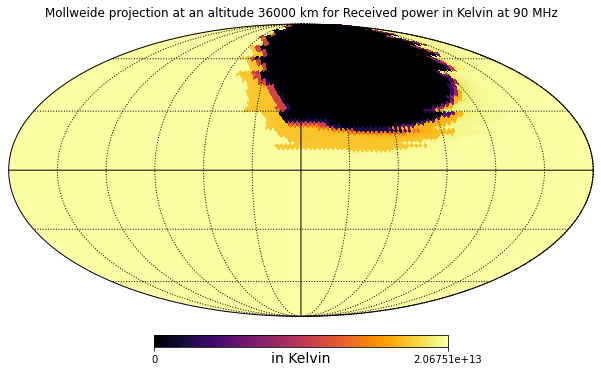

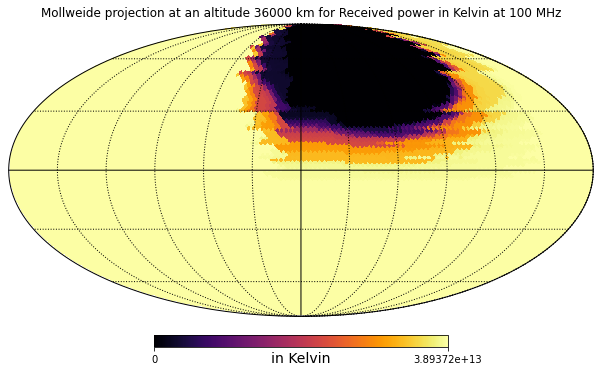

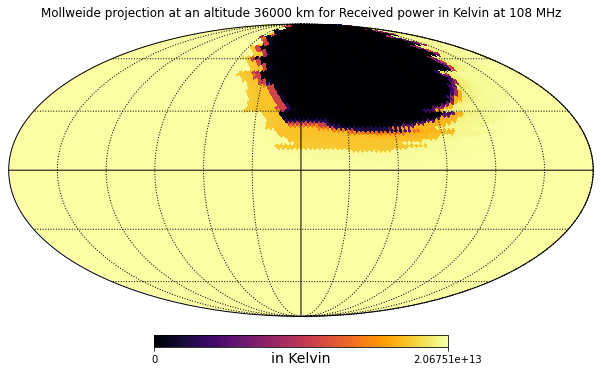

In [53]:
hp.mollview(m36,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 90 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(n36,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 100 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()
hp.mollview(p36,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 108 MHz")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz")
hp.graticule()